In [1]:
# July 16, 2023 - Attempt 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import xgboost

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_clean = df.drop(["Cabin", "Ticket"], axis=1)
df_clean.dropna(subset=["Age"], inplace=True)
df_clean = df_clean.drop("Name", axis=1)
df_clean = pd.get_dummies(df_clean, columns=["Embarked"], prefix="Embark")
df_clean = pd.get_dummies(df_clean, columns=["Pclass"], prefix="Class")
df_clean = pd.get_dummies(df_clean, columns=["Sex"], prefix="Sex")

df_clean

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embark_C,Embark_Q,Embark_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,0,1,0,0,0,1,1,0
886,887,0,27.0,0,0,13.0000,0,0,1,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,0,0,1,1,0,0,1,0
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1


In [4]:
X = df_clean.drop("Survived", axis=1)
X.head()

,PassengerId,Age,SibSp,Parch,Fare,Embark_C,Embark_Q,Embark_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,2,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,3,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,4,35.0,1,0,53.1000,0,0,1,1,0,0,1,0
4,5,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [5]:
y = df_clean["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [8]:
X_train.shape, y_train.shape

((428, 13), (428,))

In [9]:
X_test.shape, y_test.shape

((143, 13), (143,))

In [10]:
X_val.shape, y_val.shape

((143, 13), (143,))

In [11]:
X_train.head(10)

,PassengerId,Age,SibSp,Parch,Fare,Embark_C,Embark_Q,Embark_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
516,517,34.0,0,0,10.5000,0,0,1,0,1,0,1,0
606,607,30.0,0,0,7.8958,0,0,1,0,0,1,0,1
788,789,1.0,1,2,20.5750,0,0,1,0,0,1,0,1
289,290,22.0,0,0,7.7500,0,1,0,0,0,1,1,0
824,825,2.0,4,1,39.6875,0,0,1,0,0,1,0,1
884,885,25.0,0,0,7.0500,0,0,1,0,0,1,0,1
187,188,45.0,0,0,26.5500,0,0,1,1,0,0,0,1
72,73,21.0,0,0,73.5000,0,0,1,0,1,0,0,1
66,67,29.0,0,0,10.5000,0,0,1,0,1,0,1,0
877,878,19.0,0,0,7.8958,0,0,1,0,0,1,0,1


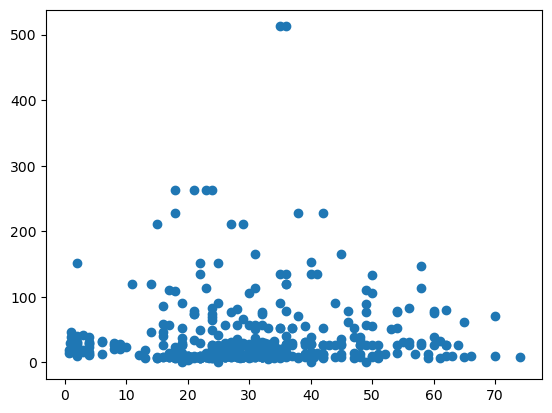

In [44]:
plt.scatter(X_train["Age"], X_train["Fare"], )

In [12]:
xgb_model = xgboost.XGBClassifier(n_estimators = 1000, learning_rate = 0.1,verbosity = 1,tree_method='gpu_hist', gpu_id=0)
xgb_model.fit(X_train,y_train, eval_set = [(X_val,y_val)], early_stopping_rounds=75)

c:\Users\kimi\anaconda3\envs\ML\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.64508
[1]	validation_0-logloss:0.60601
[2]	validation_0-logloss:0.57516
[3]	validation_0-logloss:0.55164
[4]	validation_0-logloss:0.53350
[5]	validation_0-logloss:0.51758
[6]	validation_0-logloss:0.50196
[7]	validation_0-logloss:0.49048
[8]	validation_0-logloss:0.48132
[9]	validation_0-logloss:0.47476
[10]	validation_0-logloss:0.46945
[11]	validation_0-logloss:0.46660
[12]	validation_0-logloss:0.46410
[13]	validation_0-logloss:0.46173
[14]	validation_0-logloss:0.46208
[15]	validation_0-logloss:0.46016
[16]	validation_0-logloss:0.45998
[17]	validation_0-logloss:0.46359
[18]	validation_0-logloss:0.46259
[19]	validation_0-logloss:0.46296
[20]	validation_0-logloss:0.46645
[21]	validation_0-logloss:0.47014
[22]	validation_0-logloss:0.47324
[23]	validation_0-logloss:0.47460
[24]	validation_0-logloss:0.47634
[25]	validation_0-logloss:0.47861
[26]	validation_0-logloss:0.48089
[27]	validation_0-logloss:0.48254
[28]	validation_0-logloss:0.48391
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [13]:
xgb_model.best_iteration

16

In [14]:
from sklearn.metrics import accuracy_score
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics validation:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 0.9136
Metrics validation:
	Accuracy score: 0.8392


In [15]:
X_test_prediction = xgb_model.predict(X_test)
print(accuracy_score(X_test_prediction, y_test))

0.8111888111888111


In [45]:
final_test = pd.read_csv("test.csv")
final_test = final_test.drop(["Cabin", "Ticket"], axis=1)
# final_test.fillna(subset=["Age"], inplace=True)
final_test = final_test.drop("Name", axis=1)
final_test = pd.get_dummies(final_test, columns=["Embarked"], prefix="Embark")
final_test = pd.get_dummies(final_test, columns=["Pclass"], prefix="Class")
final_test = pd.get_dummies(final_test, columns=["Sex"], prefix="Sex")
final_test

,PassengerId,Age,SibSp,Parch,Fare,Embark_C,Embark_Q,Embark_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,892,34.5,0,0,7.8292,0,1,0,0,0,1,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,895,27.0,0,0,8.6625,0,0,1,0,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,0,0,8.0500,0,0,1,0,0,1,0,1
414,1306,39.0,0,0,108.9000,1,0,0,1,0,0,1,0
415,1307,38.5,0,0,7.2500,0,0,1,0,0,1,0,1
416,1308,NaN,0,0,8.0500,0,0,1,0,0,1,0,1


In [47]:
final_pred = pd.Series(xgb_model.predict(final_test))
final_pred_table = pd.DataFrame({"PassengerId": final_test["PassengerId"], "Survived": final_pred})
final_pred_table = final_pred_table.astype(int)
final_pred_table.set_index("PassengerId", inplace=True)
final_pred_table.tail()

,Survived
PassengerId,
1305,0
1306,1
1307,0
1308,0
1309,0


In [49]:
final_pred_table.to_csv("final_pred.csv")